# Importação dos dados

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignorar FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
#Carregando os dados por Google Colab
#from google.colab import files
#uploaded = files.upload()

#Importando dados
base = pd.read_csv('dados_desafio.csv')
base

,date,hits_hour,geoNetwork_region,device_deviceCategory,editoria,trafficSource_medium,trafficSource_source,variable,value
0,20210101,0,Federal District,mobile,editoria_01,(none),(direct),usuarios,14
1,20210101,0,Federal District,mobile,editoria_01,(none),(direct),sessoes,15
2,20210101,0,Federal District,mobile,editoria_01,(none),(direct),pageviews,18
3,20210101,0,Federal District,mobile,editoria_01,organic,google,usuarios,14
4,20210101,0,Federal District,mobile,editoria_01,organic,google,sessoes,15
...,...,...,...,...,...,...,...,...,...
834805,20210503,23,State of Sao Paulo,mobile,editoria_03,(none),(direct),sessoes,21
834806,20210503,23,State of Sao Paulo,mobile,editoria_03,(none),(direct),pageviews,24
834807,20210503,23,State of Sao Paulo,mobile,editoria_03,organic,google,usuarios,45
834808,20210503,23,State of Sao Paulo,mobile,editoria_03,organic,google,sessoes,45


# Pré-Processamento

In [3]:
#observando estatistica
base.describe()

,hits_hour,value
count,834810.000000,834810.000000
mean,14.209161,48.669215
std,5.851890,99.944381
min,0.000000,1.000000
25%,10.000000,16.000000
50%,15.000000,24.000000
75%,19.000000,46.000000
max,23.000000,8048.000000


In [4]:
# Qtd de valores nulos
print('valores nulos(NA):')
display(base.isnull().sum())

print("--." * 10, '\nshape: {}.'.format(base.shape))

# Tipo das colunas
print("--." * 10, "\ndtypes:")
display(base.dtypes)

valores nulos(NA):


date                     0
hits_hour                0
geoNetwork_region        0
device_deviceCategory    0
editoria                 0
trafficSource_medium     0
trafficSource_source     0
variable                 0
value                    0
dtype: int64

--.--.--.--.--.--.--.--.--.--. 
shape: (834810, 9).
--.--.--.--.--.--.--.--.--.--. 
dtypes:


date                     object
hits_hour                 int64
geoNetwork_region        object
device_deviceCategory    object
editoria                 object
trafficSource_medium     object
trafficSource_source     object
variable                 object
value                     int64
dtype: object

In [5]:
#base.columns

In [6]:
#renomeando colunas
df = base.copy() #copiando a base para poder começar a alterar e manter a original
df.rename(columns={'date':'data', 'hits_hour':'hora', 'geoNetwork_region':'unidade',
                   'device_deviceCategory':'dispositivo', 'trafficSource_medium':'midia_origem',
                   'trafficSource_source':'origem_trafego', 'variable':'tipo_metrica', 'value':'valor_metrica'}, inplace = True)
df.head().T #mostrar as 5 primeiras linhas com dataset vertical

,0,1,2,3,4
data,20210101,20210101,20210101,20210101,20210101
hora,0,0,0,0,0
unidade,Federal District,Federal District,Federal District,Federal District,Federal District
dispositivo,mobile,mobile,mobile,mobile,mobile
editoria,editoria_01,editoria_01,editoria_01,editoria_01,editoria_01
midia_origem,(none),(none),(none),organic,organic
origem_trafego,(direct),(direct),(direct),google,google
tipo_metrica,usuarios,sessoes,pageviews,usuarios,sessoes
valor_metrica,14,15,18,14,15


In [7]:
#Quantidade de metricas no dataframe em geral ?
display(df['tipo_metrica'].value_counts())

#Separando tabela apenas com metrica pageviews para analise
df = df[df['tipo_metrica'] == 'pageviews'] #filtro
df.drop('tipo_metrica', 1, inplace=True) #excluindo coluna, como pageviews é uma constante, não tem sentido essa coluna
print('Formato do DataFrame:', df.shape)

usuarios     282959
sessoes      282959
pageviews    268892
Name: tipo_metrica, dtype: int64

Formato do DataFrame: (268892, 8)


In [8]:
#coluna = input(print('coluna: '))
#base[coluna].unique()

In [9]:
#Visualizando variaveis possiveis da coluna:
df['editoria'].unique()

array(['editoria_01', 'editoria_11', 'editoria_12', 'editoria_02',
       'editoria_05', 'Editoria_05', 'editoria_09', 'editoria_10',
       'editoria_03', 'editoria_27', 'editeria_01', 'editoria_08',
       'editoria_06', 'editoria_21', 'editoria_17', 'editoria_15',
       'editoria_32', 'editoria_16', 'editoria_04', 'editoria 11',
       'editoria_19', 'editoria_23', 'editoria_14', 'editoria_24',
       'editoria_22', 'editoria_13', 'editoria_30', 'editoria_18',
       'editoria_33', 'editoria_07', 'editoria_07 ', 'editoria_35',
       'editoria_37', 'editoria_39', 'editoria_31', 'editoria_34',
       'editoria_28', 'editoria_26', 'editoria_29', 'editoria_20',
       'editoria_36', 'editoria_38', 'editoria_25'], dtype=object)

editoria: variaveis com erros de digitação. Ex: editoria_01 & editeria_01, editoria_05 & Editoria_05

In [10]:
#Substituindo valores com erro de digitação
df.editoria.replace(['editeria_01', 'Editoria_05'], ['editoria_01', 'editoria_05'], inplace=True)

In [11]:
#Visualizando variaveis possiveis da coluna:
df['data'].unique()

array(['20210101', '01/01/21', '2021/jan/01', '21/jan/01', '20210102',
       '2021/jan/02', '02/01/21', '21/jan/02', '20210103', '03/01/21',
       '2021/jan/03', '21/jan/03', '20210104', '04/01/21', '2021/jan/04',
       '21/jan/04', '20210105', '2021/jan/05', '05/01/21', '21/jan/05',
       '20210106', '06/01/21', '2021/jan/06', '21/jan/06', '20210107',
       '07/01/21', '2021/jan/07', '21/jan/07', '20210108', '08/01/21',
       '2021/jan/08', '21/jan/08', '20210109', '2021/jan/09', '09/01/21',
       '21/jan/09', '20210110', '2021/jan/10', '10/01/21', '21/jan/10',
       '20210111', '2021/jan/11', '11/01/21', '21/jan/11', '20210112',
       '2021/jan/12', '12/01/21', '21/jan/12', '20210113', '2021/jan/13',
       '13/01/21', '21/jan/13', '20210114', '2021/jan/14', '14/01/21',
       '21/jan/14', '20210115', '15/01/21', '2021/jan/15', '21/jan/15',
       '20210116', '16/01/21', '2021/jan/16', '16-jan-2021', '21/jan/16',
       '20210117', '2021/jan/17', '17/01/21', '21/jan/17', '20

As datas estão fora de um padrão comum.

possibilidades de datas: 21.MM.DD, 21.MM.21, 21.MM.2021, 2021.MM.DD, 2021.MM.21, DD.MM.21, DD.MM.2021

...CORRIGINDO:

In [12]:
#Substituindo os meses str(jan, fev, mar) para int(01, 02, 03) e excluindo as barras(/) e traços(-), deixando apenas numeros
m = {'jan' : '01','fev':'02','mar':'03','abr':'04','mai':'05','jun':'06','jul':'07',
     'ago':'08','set':'09','out':'10','nov':'11','dez':'12','/':'', '-':''} 
#Aplicando substituição
df['data'] = df['data'].replace(m, regex=True) 

In [13]:
#Criando filtro que reconheça todos padrões possiveis
    #21.MM.DD, 21.MM.21, 21.MM.2021, 2021.MM.DD, 2021.MM.21, DD.MM.21, DD.MM.2021

#FILTRO A: para coletar as datas no padrão 21.MM.DD
filtro_A = (df['data'].str[:2] == '21')&(df['data'].str[-2::] != '21')
df_A = df[filtro_A]

#FILTRO B: para coletar as datas no padrão 21.MM.21
filtro_B = (df['data'].str[:2] == '21')&(df['data'].str[-2::] == '21')&(df['data'].str[-4::] != '2021')
df_B = df[filtro_B]

#FILTRO C: para coletar as datas no padrão 21.MM.2021
filtro_C = (df['data'].str[:2] == '21')&(df['data'].str[-4::] == '2021')
df_C = df[filtro_C]

#FILTRO D: para coletar as datas no padrão 2021.MM.DD
filtro_D = (df['data'].str[:4] == '2021')&(df['data'].str[-2::] != '21')
df_D = df[filtro_D]

#FILTRO E: para coletar as datas no padrão 2021/MM/21
filtro_E = (df['data'].str[:4] == '2021')&(df['data'].str[-2::] == '21')
df_E = df[filtro_E]

#FILTRO F: para coletar as datas no padrão DD.MM.21
filtro_F = (df['data'].str[:2] != '21')&(df['data'].str[:4] != '2021')&(df['data'].str[-4::] != '2021')
df_F = df[filtro_F]

#FILTRO G: para coletar as datas no padrão DD.MM.2021
filtro_G = (df['data'].str[:2] != '21')&(df['data'].str[-4::] == '2021')
df_G = df[filtro_G]

#Contagem para saber se os valores batem
tamanho = len(df_A.index)+len(df_B.index)+len(df_C.index)+len(df_D.index)+len(df_E.index)+len(df_F.index)+len(df_G.index)
print('quantidade de linhas alteradas: {}'.format(tamanho))
print('quantidade de linhas no df: {}'.format(len(df)))
if tamanho == len(df):
    print("alteração feita corretamente.")

quantidade de linhas alteradas: 268892
quantidade de linhas no df: 268892
alteração feita corretamente.


In [14]:
#Transformando os valores em Data
df_A['data'] = pd.to_datetime(df_A['data'], format = '%y%m%d')
df_B['data'] = pd.to_datetime(df_B['data'], format = '%y%m%d')
df_C['data'] = pd.to_datetime(df_C['data'], format = '%d%m%Y')
df_D['data'] = pd.to_datetime(df_D['data'], format = '%Y%m%d')
df_E['data'] = pd.to_datetime(df_E['data'], format = '%Y%m%d')
df_F['data'] = pd.to_datetime(df_F['data'], format = '%d%m%y')
df_G['data'] = pd.to_datetime(df_G['data'], format = '%d%m%Y')

#Aplicando na base "df"
df = pd.concat([df_A, df_B, df_C, df_D, df_E, df_F, df_G])
print('Formato do DataFrame: ', df.shape)

Formato do DataFrame:  (268892, 8)


C:\Users\ADM\AppData\Local\Temp/ipykernel_9900/2327143299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['data'] = pd.to_datetime(df_A['data'], format = '%y%m%d')
C:\Users\ADM\AppData\Local\Temp/ipykernel_9900/2327143299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B['data'] = pd.to_datetime(df_B['data'], format = '%y%m%d')
C:\Users\ADM\AppData\Local\Temp/ipykernel_9900/2327143299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

alteração do formato das datas feita.

In [15]:
#As datas estão apenas em um só formato agora.
df['data'].unique()

array(['2021-01-01T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-06T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-08T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000', '2021-01-10T00:00:00.000000000',
       '2021-01-11T00:00:00.000000000', '2021-01-12T00:00:00.000000000',
       '2021-01-13T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-01-15T00:00:00.000000000', '2021-01-16T00:00:00.000000000',
       '2021-01-17T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-01-19T00:00:00.000000000', '2021-01-20T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23T00:00:00.000000000',
       '2021-01-24T00:00:00.000000000', '2021-01-25T00:00:00.000000000',
       '2021-01-26T00:00:00.000000000', '2021-01-27T00:00:00.000000000',
       '2021-01-28T00:00:00.000000000', '2021-01-29

In [16]:
#Criando as coluna com o mês
df['mes'] = df['data'].apply(lambda x: str(x)[5:7]) #colhendo o 6º e 7º digito

#Criando coluna com dia da semana
df['dia_semana'] = df['data'].dt.day_name() #já é aplicada a mudança extaneamente porem em ingles
d = {'Sunday':'Domingo', 'Monday':'Segunda', 'Tuesday':'Terça', #renomeando os dias
     'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado'}
#d = {'Sunday':'01', 'Monday':'02', 'Tuesday':'03', #renomeando os dias em numeros
#     'Wednesday':'04', 'Thursday':'05', 'Friday':'06', 'Saturday':'07'}

df['dia_semana'] = df['dia_semana'].replace(d, regex=True) #aplicando mudança

df.sample(5) #exprime dados aleatorios

,data,hora,unidade,dispositivo,editoria,midia_origem,origem_trafego,valor_metrica,mes,dia_semana
399119,2021-03-02,19,State of Sao Paulo,mobile,editoria_06,organic,google,14,03,Terça
219857,2021-02-01,22,State of Minas Gerais,mobile,editoria_02,organic,google,32,02,Segunda
89501,2021-01-16,11,State of Sao Paulo,mobile,editoria_18,(none),(direct),33,01,Sabado
262499,2021-02-10,23,State of Rio de Janeiro,mobile,editoria_01,organic,google,39,02,Quarta
166550,2021-01-24,11,State of Santa Catarina,mobile,editoria_07,(none),(direct),15,01,Domingo


In [17]:
#Altrerando index para as datas 
#df.index = df['data']
#df.drop('data', 1, inplace=True) #removendo coluna data

In [18]:
#Criando coluna que indicam a região de onde pertencem o estado
df.loc[(df['unidade'] == 'State of Sao Paulo') | (df['unidade'] == 'State of Rio de Janeiro') | (df['unidade'] == 'State of Espirito Santo') | (df['unidade'] == 'State of Minas Gerais'), 'regiao'] = 'sudeste'
df.loc[(df['unidade'] == 'State of Amazonas') | (df['unidade'] == 'State of Roraima') | (df['unidade'] == 'State of Amapa') | (df['unidade'] == 'State of Para') | (df['unidade'] == 'State of Tocantins') | (df['unidade'] == 'State of Rondonia') | (df['unidade'] == 'State of Acre'), 'regiao'] = 'norte'
df.loc[(df['unidade'] == 'State of Maranhao') | (df['unidade'] == 'State of Piaui') | (df['unidade'] == 'State of Ceara') | (df['unidade'] == 'State of Rio Grande do Norte') | (df['unidade'] == 'State of Pernambuco') | (df['unidade'] == 'State of Paraiba') | (df['unidade'] == 'State of Sergipe') | (df['unidade'] == 'State of Alagoas') | (df['unidade'] == 'State of Bahia'), 'regiao'] = 'nordeste'
df.loc[(df['unidade'] == 'State of Mato Grosso') | (df['unidade'] == 'State of Mato Grosso do Sul') | (df['unidade'] == 'State of Goias') | (df['unidade'] == 'Federal District'), 'regiao'] = 'centro oeste'
df.loc[(df['unidade'] == 'State of Parana') | (df['unidade'] == 'State of Rio Grande do Sul') | (df['unidade'] == 'State of Santa Catarina'), 'regiao'] = 'sul'

In [19]:
#Criando subconsjuntos de cada mês para analise
sel1, sel2, sel3, sel4, sel5 = ['01'],['02'],['03'],['04'],['05']
selecao1, selecao2, selecao3, selecao4, selecao5 =  df['mes'].isin(sel1), df['mes'].isin(sel2), df['mes'].isin(sel3), df['mes'].isin(sel4), df['mes'].isin(sel5)
m1, m2, m3, m4, m5 = df[selecao1], df[selecao2], df[selecao3], df[selecao4], df[selecao5]

#visualização de cada data frame
display(m1.sample(2), m2.sample(2), m3.sample(2), m4.sample(2), m5.sample(2))

,data,hora,unidade,dispositivo,editoria,midia_origem,origem_trafego,valor_metrica,mes,dia_semana,regiao
98945,2021-01-17,9,State of Sao Paulo,mobile,editoria_04,organic,google,273,01,Domingo,sudeste
1199,2021-01-01,11,State of Paraiba,mobile,editoria_01,(none),(direct),30,01,Sexta,nordeste


,data,hora,unidade,dispositivo,editoria,midia_origem,origem_trafego,valor_metrica,mes,dia_semana,regiao
361655,2021-02-25,12,State of Sao Paulo,mobile,editoria_08,referral,facebook,19,02,Quinta,sudeste
384707,2021-02-28,16,State of Parana,mobile,editoria_05,(none),(direct),72,02,Domingo,sul


,data,hora,unidade,dispositivo,editoria,midia_origem,origem_trafego,valor_metrica,mes,dia_semana,regiao
619745,2021-03-29,21,State of Alagoas,mobile,editoria_01,(none),(direct),20,03,Segunda,nordeste
434105,2021-03-06,23,State of Bahia,mobile,editoria_01,(none),(direct),90,03,Sabado,nordeste


,data,hora,unidade,dispositivo,editoria,midia_origem,origem_trafego,valor_metrica,mes,dia_semana,regiao
641636,2021-04-02,7,State of Sao Paulo,mobile,editoria_02,organic,google,39,04,Sexta,sudeste
697019,2021-04-09,14,State of Mato Grosso do Sul,mobile,editoria_01,(none),(direct),24,04,Sexta,centro oeste


,data,hora,unidade,dispositivo,editoria,midia_origem,origem_trafego,valor_metrica,mes,dia_semana,regiao
824729,2021-05-02,0,State of Sao Paulo,mobile,editoria_04,(none),(direct),76,05,Domingo,sudeste
826175,2021-05-02,13,State of Rio de Janeiro,mobile,editoria_02,(none),(direct),33,05,Domingo,sudeste


In [20]:
#Criando subconsjuntos dos dados originais, dividindo em duas partes: baixo(Sudeste e Sul) e cima(Norte, Nordeste e Centro-Oeste)
sel = ['sul', 'sudeste']
selecao =  df['regiao'].isin(sel)
baixo = df[selecao]

sel = ['norte', 'nordeste', 'centro oeste']
selecao = df['regiao'].isin(sel)
cima = df[selecao]

#df.to_csv('df.csv')
#cima.to_csv('cima.csv')
#baixo.to_csv('baixo.csv')

# Analise de Dados

unidade
State of Acre                       113
State of Roraima                    270
State of Amapa                     3148
State of Tocantins                13001
State of Rondonia                 13946
State of Sergipe                  24001
State of Alagoas                  39528
State of Piaui                    48518
State of Paraiba                  77885
State of Amazonas                 99066
State of Mato Grosso             107209
State of Rio Grande do Norte     120197
State of Maranhao                128347
State of Mato Grosso do Sul      132140
State of Para                    191475
State of Espirito Santo          209268
State of Goias                   289771
State of Ceara                   336826
Federal District                 347895
State of Pernambuco              399784
State of Santa Catarina          498234
State of Bahia                   724044
State of Parana                  850932
State of Rio Grande do Sul       865378
State of Minas Gerais           

<AxesSubplot:ylabel='unidade'>

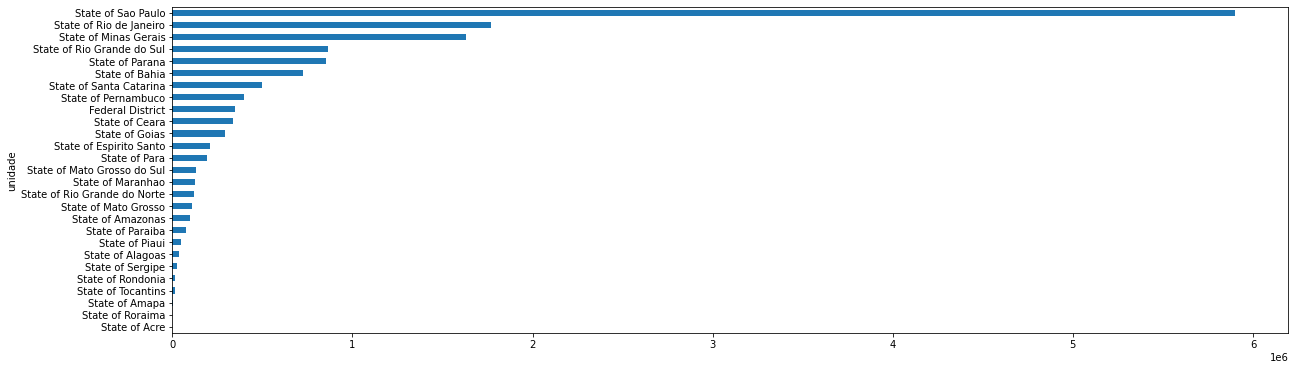

In [21]:
#Qual o número de pageviews por Estado ? 

a = df.groupby(['unidade'])['valor_metrica'].sum().sort_values()
display(a)
display(a.plot.barh(figsize=(20,6)))

São Paulo sendo o estado mais populoso do Brasil ja era se esperar de ser o primeiro, É notorio também que os estados da região Sul e Sudeste acompanha na lideraça de numero de pageviews

regiao
sudeste         9506637
sul             2214544
nordeste        1899130
centro oeste     877015
norte            321019
Name: valor_metrica, dtype: int64

<AxesSubplot:xlabel='regiao'>

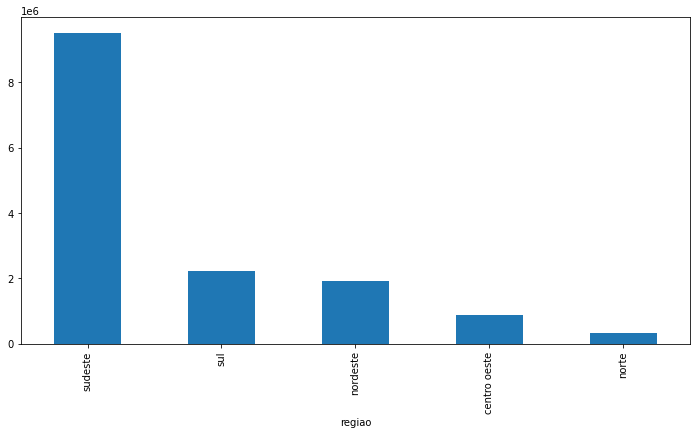

In [22]:
#Qual região mais gera pageview ?
a = df.groupby(['regiao'])['valor_metrica'].sum().sort_values(ascending = False)
display(a)
display(a.plot.bar(figsize=(12,6)))

Uouu! 9 milhões, realmente sudeste esta liderando totalmente na quantidade de pageviews

In [23]:
#Função que retona os valores totais e percentuais totais de pageviews, mais um plot
def func(dataset, coluna):
    s = dataset.groupby([coluna])['valor_metrica'].sum().sort_values(ascending = False).reset_index()
    ss = s.copy()

    #tranformando em porcentagem
    ss['valor_metrica'] = ss['valor_metrica'].apply(lambda x: (x*100)/sum(ss['valor_metrica']))

    print('quantidade:')
    display(s)
    print('em porcentual:')
    display(ss)
    display(s.plot.bar(x=coluna, y='valor_metrica', figsize=(12,6)))

quantidade:


,regiao,valor_metrica
0,sudeste,9506637
1,sul,2214544
2,nordeste,1899130
3,centro oeste,877015
4,norte,321019


em porcentual:


,regiao,valor_metrica
0,sudeste,64.154513
1,sul,14.944611
2,nordeste,12.816074
3,centro oeste,5.918441
4,norte,2.166362


<AxesSubplot:xlabel='regiao'>

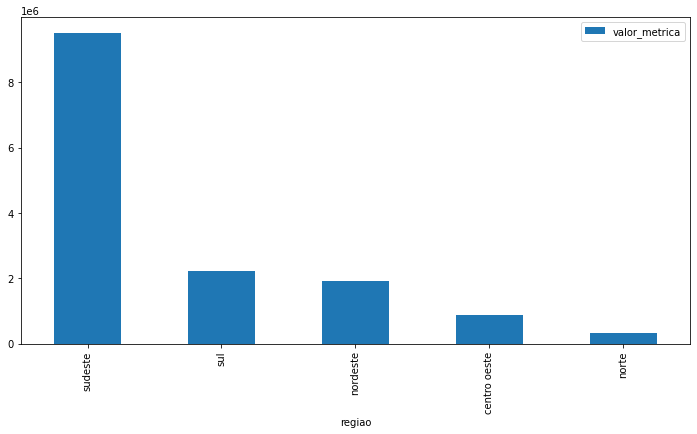

In [24]:
#Qual região mais gerou pageviews ?
func(df, 'regiao')

Só as regiões sudeste e sul desde compoe quase 80% do total da quantidade de pageview

<AxesSubplot:xlabel='data'>

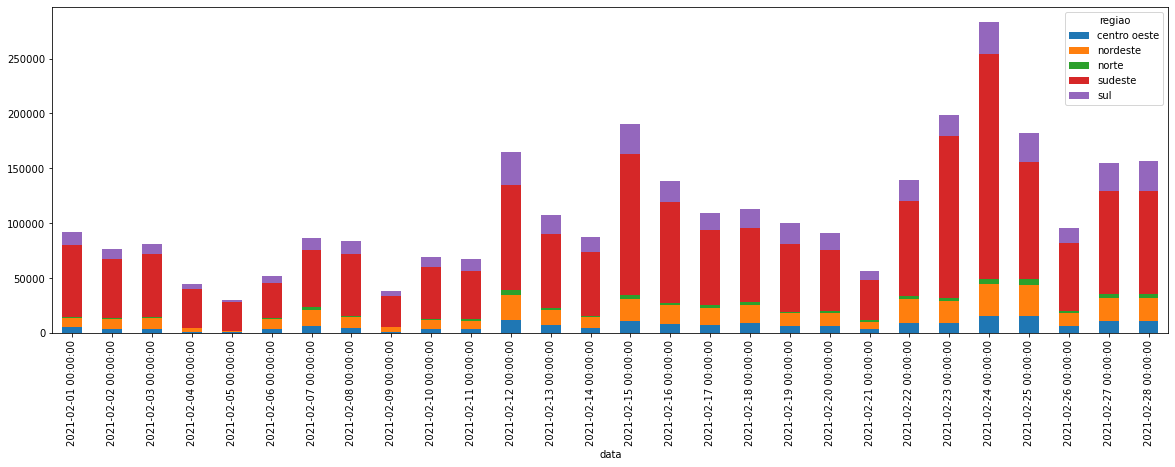

In [25]:
c = m2.groupby(['regiao', 'data'])['valor_metrica'].sum().unstack()
cc = c.T

display(cc.plot.bar(stacked=True, figsize=(20,6)))

In [26]:
#função para exprimir a quantidade de pageviews por mes da coluna pedida
def func2(dataset, coluna):
    c = dataset.groupby([coluna, 'mes'])['valor_metrica'].sum().unstack()
    c.iloc[pd.isnull(c)] = 0 #substituindo os valores NaN por 0

    #transformando em porcenteagem
    C = c.copy()
    C['01'] = C['01'].apply(lambda x: (x*100)/sum(C['01']))
    C['02'] = C['02'].apply(lambda x: (x*100)/sum(C['02']))
    C['03'] = C['03'].apply(lambda x: (x*100)/sum(C['03']))
    C['04'] = C['04'].apply(lambda x: (x*100)/sum(C['04']))
    C['05'] = C['05'].apply(lambda x: (x*100)/sum(C['05']))

    C  = C.apply(lambda x: round(x,4), axis = 1) #arredondando para quatro casas decimais
    
    print('quantidade pageview por mês')
    display(c) #normal
    print('porcentagem:')
    display(C) #em porcentagem
    cc = c.T
    display(cc.plot.bar(stacked=True, figsize=(12,6)))

quantidade pageview por mês


mes,01,02,03,04,05
regiao,,,,,
centro oeste,238104,178791,274154,176308,9658
nordeste,479072,388088,621030,386607,24333
norte,101517,59490,93943,61551,4518
sudeste,2788766,2027805,2812766,1758537,118763
sul,612141,431198,745050,400509,25646


porcentagem:


mes,01,02,03,04,05
regiao,,,,,
centro oeste,5.6428,5.7948,6.0294,6.3340,5.2800
nordeste,11.3535,12.5783,13.6582,13.8892,13.3027
norte,2.4058,1.9281,2.0661,2.2113,2.4700
sudeste,66.0908,65.7232,61.8606,63.1769,64.9269
sul,14.5071,13.9756,16.3857,14.3886,14.0205


<AxesSubplot:xlabel='mes'>

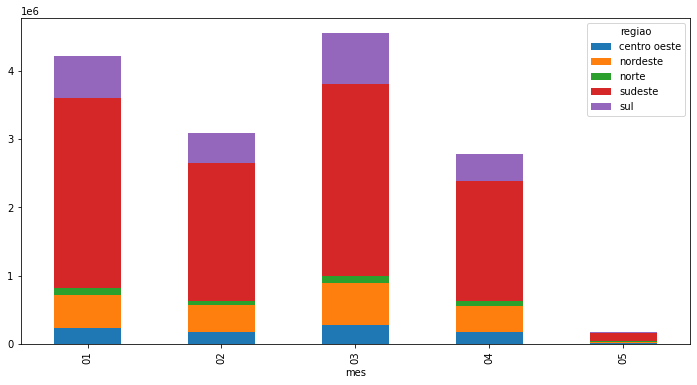

In [27]:
#Comparar por mês

func2(df, "regiao")

Olhando a tabela com as porcentagem nota-se que praticamente manteve a mesma proporção na distribuição de views por região.

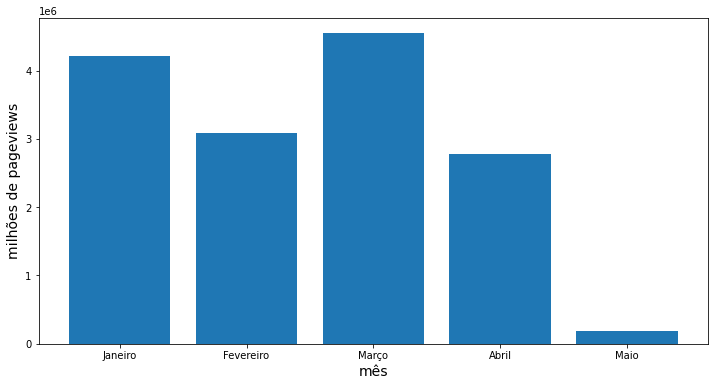

In [28]:
a = df.groupby(['mes'])['valor_metrica'].sum().reset_index()

plt.figure(figsize=(12,6)) #tamanho da figura
plt.bar(a['mes'], a['valor_metrica']) #plot

#mudando rotulos do eixos x
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio']
plt.xticks(a['mes'], meses)

#nomeando eixos
plt.ylabel('milhões de pageviews', fontsize = 14)
plt.xlabel('mês', fontsize = 14)

plt.show()

In [29]:
#função para acompanhar
def comparar(dataset, coluna):
    x = dataset.groupby(['data', coluna])['valor_metrica'].sum().reset_index()
    sns.set_palette("Set1") #paleta de cores
    sns.set_style('whitegrid') #cor da grade(fundo)
    ax = sns.lineplot(x='data', y='valor_metrica', hue=coluna, data=x)#'hue' serve para criar separação
    ax.figure.set_size_inches(16,6) #tamanho do grafico

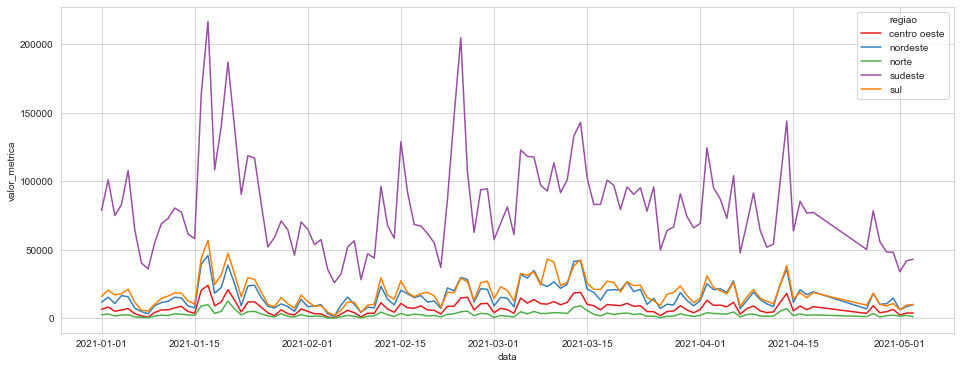

In [30]:
comparar(df, 'regiao')

O formato de cada linha são semelhantes, praticamente só há diferença na proporção.

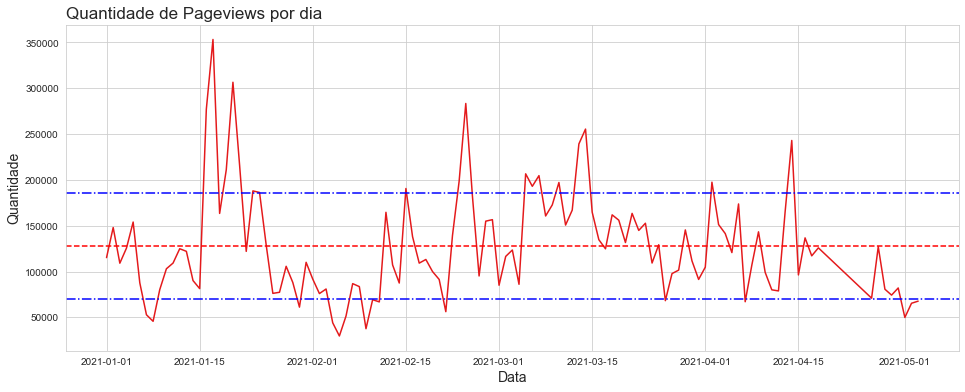

In [31]:
A = df.groupby(['data'])['valor_metrica'].sum().reset_index()
sns.set_palette('Set1') #paleta de cores
sns.set_style('whitegrid') #cor da grade(fundo)
ax = sns.lineplot(x= 'data', y= 'valor_metrica', data=A) #gerando graficos, parametros
ax.figure.set_size_inches(16,6) #tamanho do grafico
ax.set_title('Quantidade de Pageviews por dia', loc='left', fontsize=17) #titulo, localização do titulo, tamanho
ax.set_xlabel('Data', fontsize=14) #legenda do eixo x
ax.set_ylabel('Quantidade', fontsize=14) #legenda do eixo y
ax = ax #para não mostrar nenhum texto em cima do grafico    
plt.axhline(float(A.mean()), 0, 1, color='r', **{'ls':'--'}) #linha traçando a média
plt.axhline(float(A.mean() - float(A['valor_metrica'].std())), 0, 1, color='b', **{'ls':'-.'})
plt.axhline(float(A.mean() + float(A['valor_metrica'].std())), 0, 1, color='b', **{'ls':'-.'})

In [32]:
#Função para plotar graficos de linhas temporais 
def plot_lin(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Set1') #paleta de cores
    sns.set_style('whitegrid') #cor da grade(fundo)
    ax = sns.lineplot(x=x, y=y, data=dataset) #gerando graficos, parametros
    ax.figure.set_size_inches(16,10) #tamanho do grafico
    ax.set_title(titulo, loc='left', fontsize=17) #titulo, localização do titulo, tamanho
    ax.set_xlabel(labelx, fontsize=14) #legenda do eixo x
    ax.set_ylabel(labely, fontsize=14) #legenda do eixo y
    ax = ax #para não mostrar nenhum texto em cima do grafico
    
def descricao(dataset):
    g = dataset.groupby(['data'])['valor_metrica'].sum().reset_index()
    g['aumento'] = g['valor_metrica'].diff()
    g['aceleracao'] = g['aumento'].diff()
    print('Estatisticas das quantidade de dados:')
    display(g.describe())
    plt.subplot(3,1,1)
    plot_lin('Quantidade de Pageviews por dia', 'Data', 'Quantidade', 'data', 'valor_metrica', g)
    plt.subplot(3,1,2)
    plot_lin('Aumento Pageviews', 'Data', 'Aumento', 'data', 'aumento', g)
    plt.subplot(3,1,3)
    plot_lin('Aceleracao Pageviews', 'Data', 'Aceleracão', 'data', 'aceleracao', g)

Estatisticas das quantidade de dados:


,valor_metrica,aumento,aceleracao
count,116.000000,115.000000,114.000000
mean,127744.353448,-412.913043,-267.561404
std,58226.454786,54949.195446,85075.136946
min,29680.000000,-189781.000000,-265990.000000
25%,85808.750000,-32964.000000,-49294.500000
50%,116792.000000,-1736.000000,10667.500000
75%,157576.000000,31550.000000,45667.250000
max,353180.000000,195618.000000,237448.000000


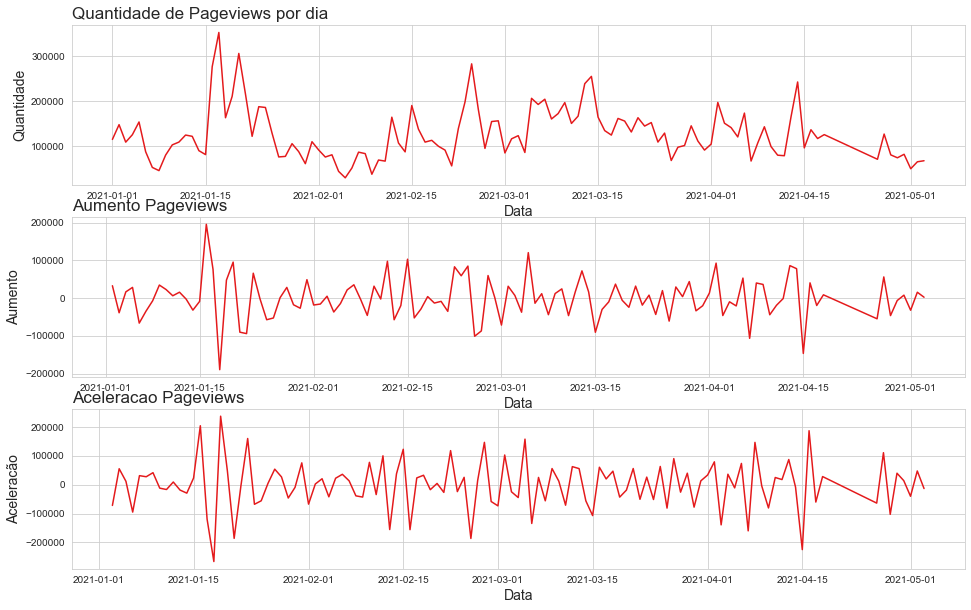

In [33]:
descricao(A)

<BarContainer object of 24 artists>

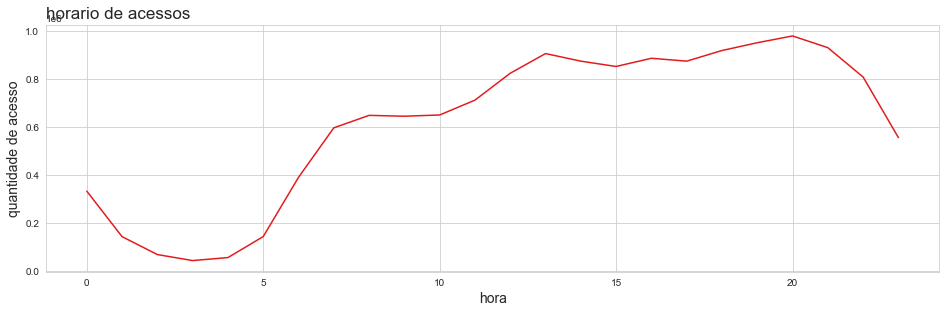

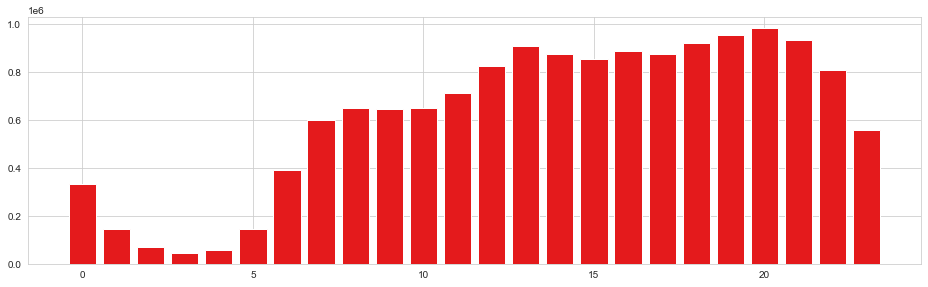

In [34]:
#Em qual hora mais acessam a plataforma ?
hora = df.groupby(['hora'])['valor_metrica'].sum().reset_index()

#reaproveitando função anteriormente criada
plt.subplot(2,1,1)
plot_lin('horario de acessos', 'hora', 'quantidade de acesso', 'hora', 'valor_metrica', hora)

plt.figure(figsize=(16,10)) #tamanho da figura
plt.subplot(2,1,2)
plt.bar(hora['hora'], hora['valor_metrica']) #plot



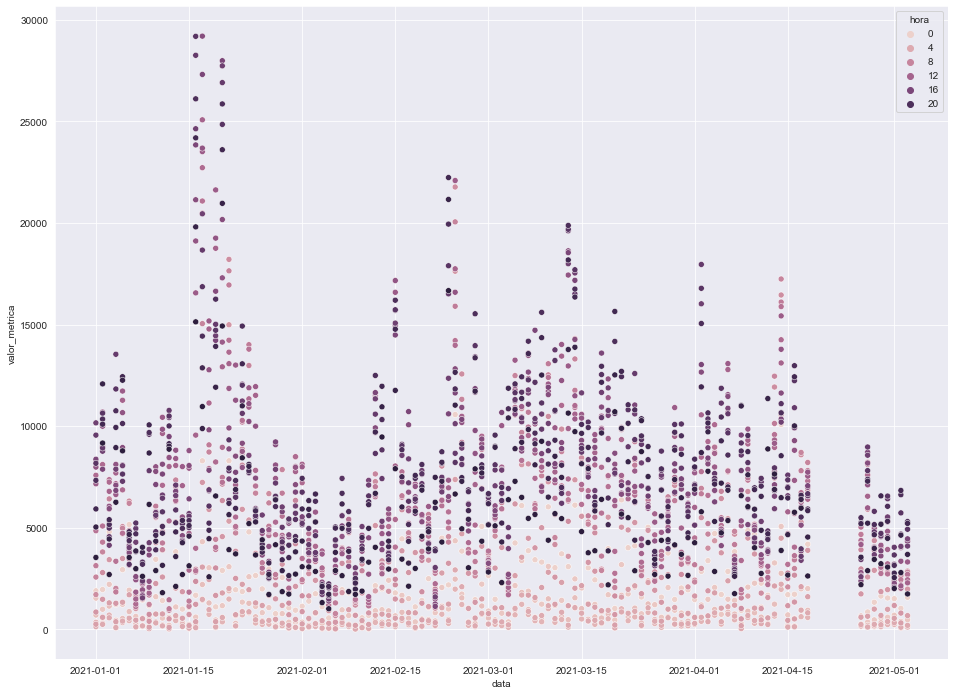

In [35]:
a = df.groupby(['data', 'hora'])['valor_metrica'].sum().reset_index()
sns.set_palette('bright') #paleta de cores
sns.set_style('darkgrid') #cor da grade(fundo)
ax = sns.scatterplot( data=a, x = 'data', y = 'valor_metrica', hue ='hora') #, size='hora'
ax.figure.set_size_inches(16,12)

os acessos estão no pico em torno das 20h e depois há uma queda, voltando a aumentar depois das 5h

quantidade pageview por mês


mes,01,02,03,04,05
dispositivo,,,,,
desktop,67721,82651,147960,134859,8046
mobile,4148612,2996940,4390132,2642330,173990
tablet,3267,5781,8851,6323,882


porcentagem:


mes,01,02,03,04,05
dispositivo,,,,,
desktop,1.6049,2.6788,3.2541,4.8449,4.3987
mobile,98.3177,97.1338,96.5513,94.9279,95.1191
tablet,0.0774,0.1874,0.1947,0.2272,0.4822


<AxesSubplot:xlabel='mes'>

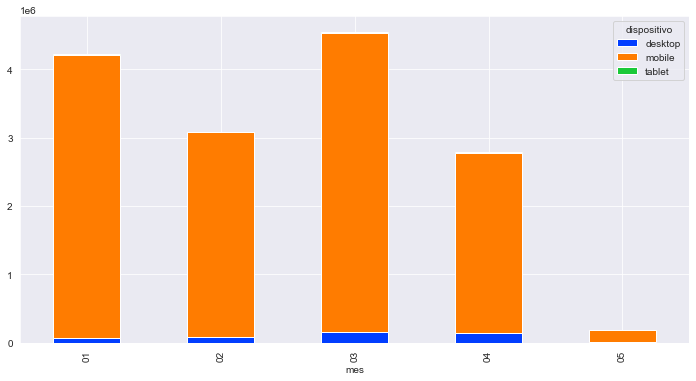

In [36]:
#De qual forma os usuários mais acessam à página ?
func2(df, "dispositivo")

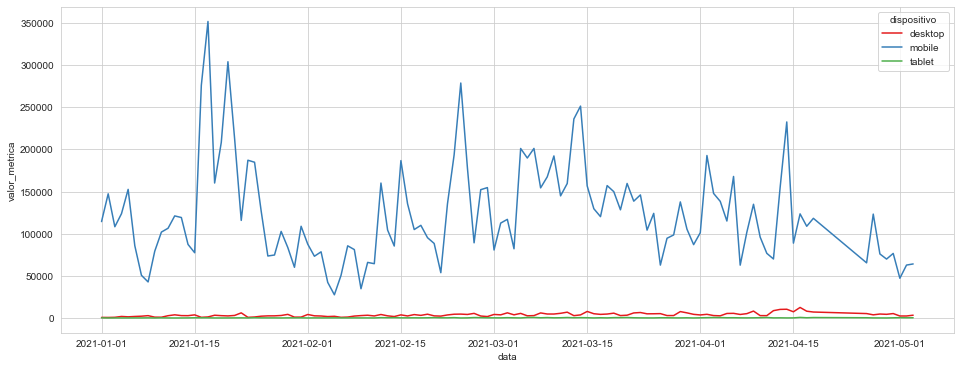

In [37]:
comparar(df, 'dispositivo')

Mobile é a forma que mais acessam, isso é um grande direcionamento para investir mais no marketing focado em dispositivo.

quantidade:


,origem_trafego,valor_metrica
0,(direct),8326985
1,google,4508979
2,facebook,897562
3,googleapis.com,785924
4,news.google.com,111053
5,twitter,67366
6,paywall,65778
7,pushnews,37036
8,taboola,6265
9,bing,4234


em porcentual:


,origem_trafego,valor_metrica
0,(direct),56.193758
1,google,30.428358
2,facebook,6.057100
3,googleapis.com,5.303723
4,news.google.com,0.749429
5,twitter,0.454612
6,paywall,0.443896
7,pushnews,0.249933
8,taboola,0.042279
9,bing,0.028573


<AxesSubplot:xlabel='origem_trafego'>

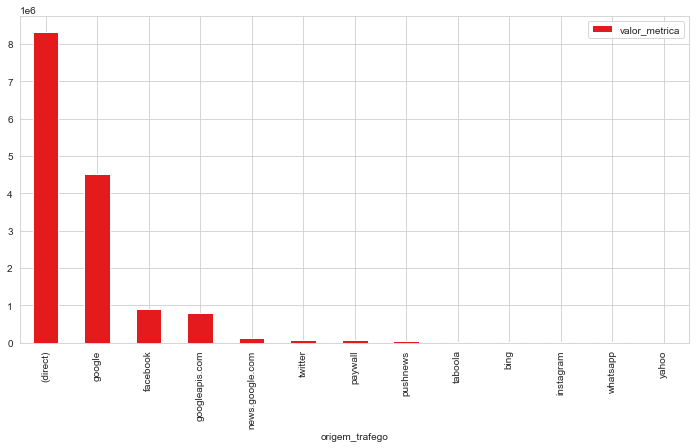

In [38]:
func(df, 'origem_trafego')

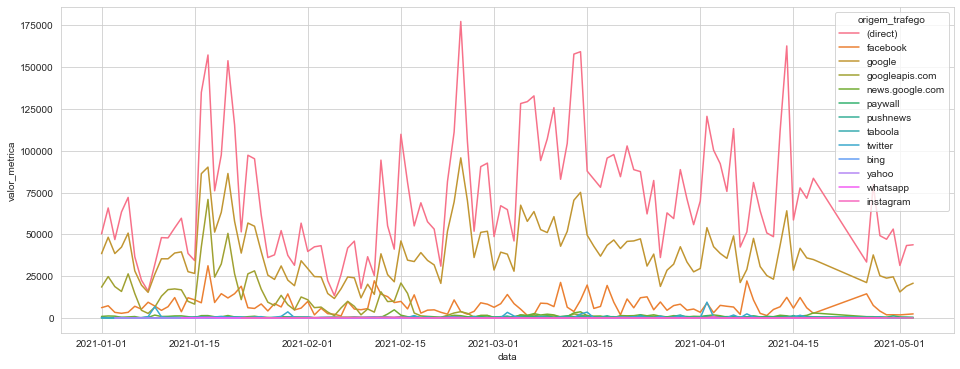

In [39]:
comparar(df, 'origem_trafego')

OBSERVAÇÕES E INSIGHTS:

(direct): significa que o grupo está com público praticamente já fidelizado, as pessoas veem diretamente na URL da pagina quando buscam conteudo para lê, se informar ou porque ja criaram o costume de visitar a pagina.

google: esta indo muito bem a Grupo Abril na questão de criar mecanismo de pesquisa ou dominio.

facebook, twitter: grupo abril está investindo bem nessas midias sociais distribuindo links em publicações de trechos de artigos ou sendo compartilhada pelo próprio público.

whatsapp: não está sendo tão bem compartilhada de individuo para individuo na rede social.

quantidade:


,midia_origem,valor_metrica
0,(none),8326985
1,organic,4513376
2,referral,1854565
3,(not set),68208
4,pushnotification,36903
5,social,17905
6,feed,330
7,cpc,73


em porcentual:


,midia_origem,valor_metrica
0,(none),56.193758
1,organic,30.458030
2,referral,12.515332
3,(not set),0.460294
4,pushnotification,0.249036
5,social,0.120830
6,feed,0.002227
7,cpc,0.000493


<AxesSubplot:xlabel='midia_origem'>

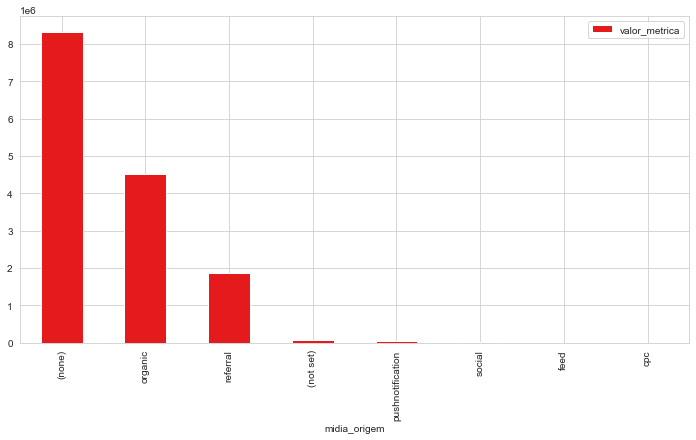

In [40]:
func(df, 'midia_origem')

quantidade pageview por mês


mes,01,02,03,04,05
midia_origem,,,,,
(none),1981412.0,1713143.0,2774141.0,1739744.0,118545.0
(not set),10941.0,13319.0,24177.0,18098.0,1673.0
cpc,0.0,0.0,31.0,0.0,42.0
feed,0.0,0.0,148.0,182.0,0.0
organic,1294139.0,971445.0,1382576.0,809696.0,55520.0
pushnotification,6817.0,7184.0,15666.0,6812.0,424.0
referral,917709.0,371964.0,349429.0,208749.0,6714.0
social,8582.0,8317.0,775.0,231.0,0.0


porcentagem:


mes,01,02,03,04,05
midia_origem,,,,,
(none),46.9573,55.5247,61.0111,62.5018,64.8077
(not set),0.2593,0.4317,0.5317,0.6502,0.9146
cpc,0.0000,0.0000,0.0007,0.0000,0.0230
feed,0.0000,0.0000,0.0033,0.0065,0.0000
organic,30.6697,31.4855,30.4067,29.0890,30.3524
pushnotification,0.1616,0.2328,0.3445,0.2447,0.2318
referral,21.7487,12.0557,7.6849,7.4995,3.6705
social,0.2034,0.2696,0.0170,0.0083,0.0000


<AxesSubplot:xlabel='mes'>

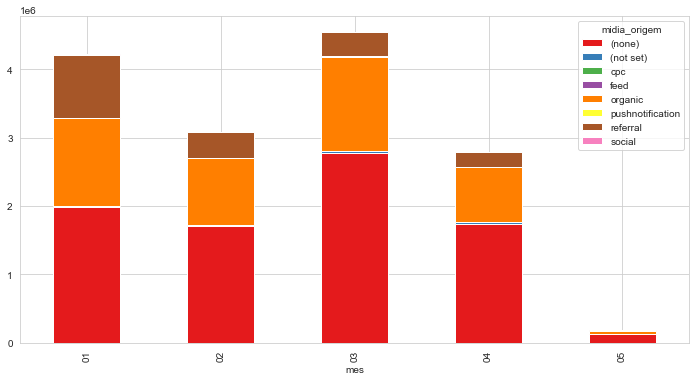

In [41]:
func2(df, 'midia_origem')

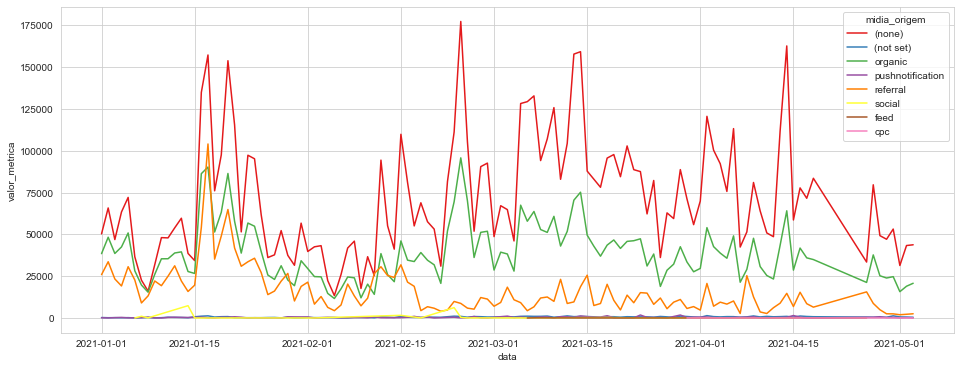

In [42]:
comparar(df, 'midia_origem')

OBSERVAÇÕES E INSIGHTS:

(none): assim como no (direct) na origem do trafego, a um certo publico já finalizado, os valores são exatamente iguais.
[no terceiro mês deu uma crescida na quantidade]

organic: Abril está indo bem no trafego não pago de mecanismo de pesquisa, isso significa que as tags estão otimas.

referência: há bastante links em outros sites que direcionam clientes para a Abril.**********DIMINUIU A QUANTIDADE DE PAGEVIEW DESSA METRICA************

social: a quantidade de direcionamento por link em mídia social está estranhamente baixa.

cpc: o tráfego pago de mecanismos de pesquisa está quase nulo, esta sendo um investimento quase inutil.


quantidade:


,editoria,valor_metrica
0,editoria_01,5167752
1,editoria_02,3245363
2,editoria_03,1317901
3,editoria_04,962447
4,editoria_05,825722
5,editoria_07,588850
6,editoria_06,480775
7,editoria_08,463723
8,editoria_10,248809
9,editoria_09,226296


em porcentual:


,editoria,valor_metrica
0,editoria_01,34.874016
1,editoria_02,21.900982
2,editoria_03,8.893712
3,editoria_04,6.494970
4,editoria_05,5.572296
5,editoria_07,3.973791
6,editoria_06,3.244458
7,editoria_08,3.129385
8,editoria_10,1.679061
9,editoria_09,1.527134


<AxesSubplot:xlabel='editoria'>

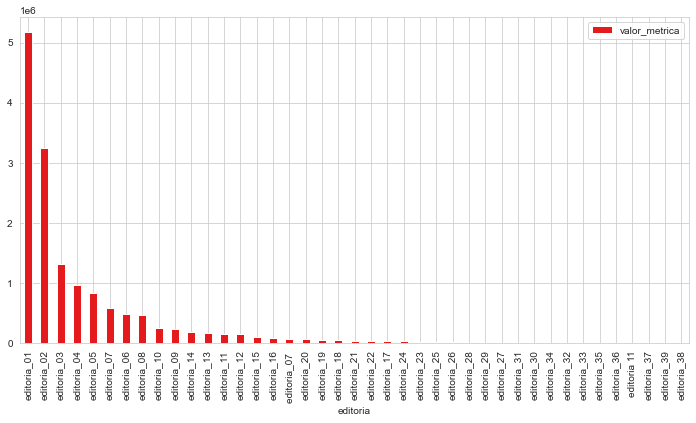

In [43]:
#Qual agrupamento de matérias por assunto gera mais pageviews ?
func(df, 'editoria')

In [44]:
#Plot
def plot_semana(dataset):
    a = dataset.groupby(['data', 'dia_semana'])['valor_metrica'].sum().reset_index()
    sns.set_palette('bright') #paleta de cores
    sns.set_style('darkgrid') #cor da grade(fundo)
    ax = sns.scatterplot(x='data', y='valor_metrica', hue='dia_semana', data=a)
    ax.figure.set_size_inches(16,6)

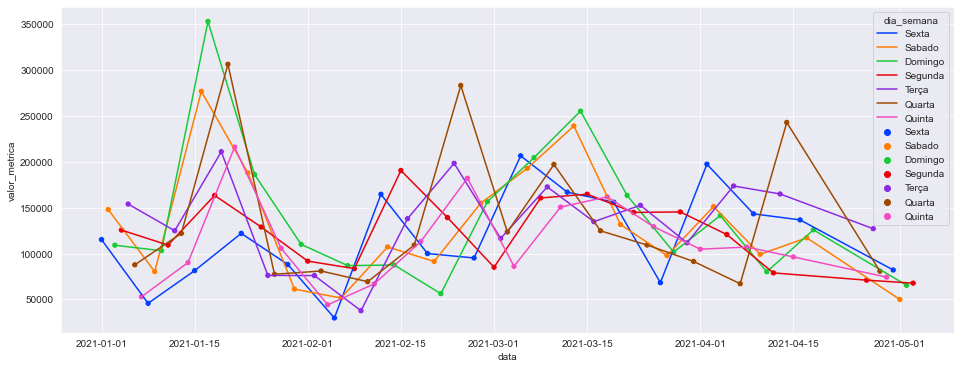

In [45]:
a = df.groupby(['data', 'dia_semana'])['valor_metrica'].sum().reset_index()
sns.set_palette('bright') #paleta de cores
sns.set_style('darkgrid') #cor da grade(fundo)
ax = sns.scatterplot(x='data', y='valor_metrica', hue='dia_semana', data=a)
abx = sns.lineplot(x='data', y='valor_metrica', hue='dia_semana', data=a)
ax.figure.set_size_inches(16,6)

visualmente domingo aparenta ser o dia que mais gera pageview

In [46]:
a.groupby(['dia_semana'])['valor_metrica'].sum().sort_values(ascending = False).reset_index()

,dia_semana,valor_metrica
0,Domingo,2386197
1,Sabado,2238166
2,Quarta,2173062
3,Terça,2169991
4,Segunda,2070888
5,Sexta,1998897
6,Quinta,1781144


In [47]:
#Descrição da variação de pageview durante o mês
a = df.groupby(['data', 'dia_semana'])['valor_metrica'].sum().reset_index()
    
#mudando para numero para poder ficar na ordem
d = {'Domingo':'01', 'Segunda':'02', 'Terça':'03', 
 'Quarta':'04', 'Quinta':'05', 'Sexta':'06', 'Sabado':'07'}
a['dia_semana'] = a['dia_semana'].replace(d, regex=True)
    
display(a.groupby(['dia_semana'])['valor_metrica'].describe().reset_index())

,dia_semana,count,mean,std,min,25%,50%,75%,max
0,01,17.0,140364.529412,76069.100949,56198.0,87445.00,110039.0,163438.00,353180.0
1,02,17.0,121816.941176,37504.929035,67687.0,85034.00,125582.0,145377.00,190554.0
2,03,16.0,135624.437500,46037.871309,37617.0,115265.25,136375.5,166897.75,211066.0
3,04,16.0,135816.375000,77861.771070,67039.0,80874.00,109216.5,142878.25,306492.0
4,05,16.0,111321.500000,47003.969303,44042.0,83115.50,105217.5,134575.25,216144.0
5,06,17.0,117582.176471,50671.422711,29680.0,82038.00,115172.0,155993.00,206592.0
6,07,17.0,131656.823529,64310.515593,49860.0,91352.00,117106.0,154941.00,276971.0


OBSERVAÇÕES:

media: vendo em conta o maximo já atingido por dia a média está em um nivel bom, atingindo quase 50% do recorde nos ultimo 4 meses.

std: o desvio padrão está bem baixo indicando baixo nivel de variação de pageviews diarias.

min: valor minimo atingido está em um nivel bom, porém dá para melhorar.

max: eis a grande questão, está considerando ou não outliers ?

In [49]:
df.columns

Index(['data', 'hora', 'unidade', 'dispositivo', 'editoria', 'midia_origem',
       'origem_trafego', 'valor_metrica', 'mes', 'dia_semana', 'regiao'],
      dtype='object')

In [73]:
dff = df.groupby(['data', 'unidade', 'dispositivo', 'editoria', 'midia_origem',
       'origem_trafego'])['valor_metrica'].sum().reset_index()
dff

,data,unidade,dispositivo,editoria,midia_origem,origem_trafego,valor_metrica
0,2021-01-01,Federal District,desktop,editoria_11,organic,google,14
1,2021-01-01,Federal District,desktop,editoria_12,organic,google,14
2,2021-01-01,Federal District,mobile,editoria_01,(none),(direct),996
3,2021-01-01,Federal District,mobile,editoria_01,organic,google,870
4,2021-01-01,Federal District,mobile,editoria_01,referral,googleapis.com,465
...,...,...,...,...,...,...,...
37305,2021-05-03,State of Sao Paulo,mobile,editoria_33,pushnotification,pushnews,18
37306,2021-05-03,State of Sao Paulo,tablet,editoria_11,(none),(direct),15
37307,2021-05-03,State of Sao Paulo,tablet,editoria_11,(not set),paywall,16
37308,2021-05-03,State of Sao Paulo,tablet,editoria_12,(not set),paywall,14


In [76]:
dff.drop('data', 1, inplace=True) 

In [78]:
count = 0

for i in dff.columns:
    count += 1
    print(count)

1
2
3
4
5
6


In [79]:
X_df = dff.iloc[:, 0:5].values
y_df = dff.iloc[:, 5].values

In [80]:
display(X_df)
display(y_df)

array([['Federal District', 'desktop', 'editoria_11', 'organic',
        'google'],
       ['Federal District', 'desktop', 'editoria_12', 'organic',
        'google'],
       ['Federal District', 'mobile', 'editoria_01', '(none)',
        '(direct)'],
       ...,
       ['State of Sao Paulo', 'tablet', 'editoria_11', '(not set)',
        'paywall'],
       ['State of Sao Paulo', 'tablet', 'editoria_12', '(not set)',
        'paywall'],
       ['State of Sergipe', 'mobile', 'editoria_25', '(none)',
        '(direct)']], dtype=object)

array([ 14,  14, 996, ...,  16,  14,  15], dtype=int64)

In [81]:
dff.columns

Index(['unidade', 'dispositivo', 'editoria', 'midia_origem', 'origem_trafego',
       'valor_metrica'],
      dtype='object')

In [82]:
#Biblioteca que vai possibilitar transformação de variavel categorico para numerico
from sklearn.preprocessing import LabelEncoder

#Instanciando um objeto para cada atributo categorico
label_encoder_unidade = LabelEncoder()
label_encoder_dispositivo = LabelEncoder()
label_encoder_editoria = LabelEncoder()
label_encoder_midia_origem = LabelEncoder()
label_encoder_origem_trafego = LabelEncoder()

In [84]:
#Aplicando o processamento
X_df[:,0] = label_encoder_unidade.fit_transform(X_df[:,0])
X_df[:,1] = label_encoder_dispositivo.fit_transform(X_df[:,1])
X_df[:,2] = label_encoder_editoria.fit_transform(X_df[:,2])
X_df[:,3] = label_encoder_midia_origem.fit_transform(X_df[:,3])
X_df[:,4] = label_encoder_origem_trafego.fit_transform(X_df[:,4])

In [85]:
X_df

array([[0, 0, 12, 4, 3],
       [0, 0, 13, 4, 3],
       [0, 1, 1, 0, 0],
       ...,
       [24, 2, 12, 1, 7],
       [24, 2, 13, 1, 7],
       [25, 1, 26, 0, 0]], dtype=object)

In [86]:
#dividindo em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_df, y_df, test_size=0.25, random_state=0)

X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((27982, 5), (27982,), (9328, 5), (9328,))

In [87]:
from sklearn.tree import DecisionTreeClassifier

classificador_arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classificador_arvore.fit(X_treino, y_treino)

previsoes = classificador_arvore.predict(X_teste)

#Comparativo
display(previsoes)
display(y_teste)

array([266,  19,  35, ...,  32,  15,  30], dtype=int64)

array([ 406,  237,  112, ...,   36, 1641,  995], dtype=int64)

In [90]:
from sklearn.naive_bayes import GaussianNB

classificador_naivebayes = GaussianNB() #instanciando
classificador_naivebayes.fit(X_treino, y_treino) #treinando algoritmo

previsoes = classificador_naivebayes.predict(X_teste) #gerando previsoes

#Comparativo
display(previsoes)
display(y_teste)

array([2072, 1005, 1320, ..., 1650, 1167, 1296], dtype=int64)

array([ 406,  237,  112, ...,   36, 1641,  995], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_arvore = accuracy_score(y_teste, previsoes)
print('Acuraria-->', accuracy_arvore)

Acuraria--> 0.00986277873070326


OBSERVAÇÕES:

no valor maximo é sim considerando os outliers, o valor padrão maximo ideal para analise estatistica esta ainda abaixo do valor dado no describe dos pageviews, acima deste valor esta fora do intervalo interquartílico dado pela distância entre o primeiro e o terceiro quartil.

In [ ]:
#boxplot

In [ ]:
#clusterização